Dados: Vendas de casas baseado em caracteristicas

In [1]:
import pandas as pd

dados = pd.read_csv("Preços_de_casas.csv")
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [2]:
#Removendo ID ja que não vai ser relevante pra analise
dados = dados.drop(columns="Id")
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   area_primeiro_andar             1438 non-null   float64
 1   existe_segundo_andar            1438 non-null   int64  
 2   area_segundo_andar              1438 non-null   float64
 3   quantidade_banheiros            1438 non-null   int64  
 4   capacidade_carros_garagem       1438 non-null   int64  
 5   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 6   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 78.8 KB


#correlação com o preço de venda, sendo que quanto maior esse número, mais correlacionada está a característica com o preço de venda, essa métrica varia entre -1 e 1. (intencidade e direção)

***Intensidade: refere-se à força da relação entre as variáveis medidas. Pode variar de -1 a +1, onde -1 indica uma correlação perfeitamente negativa, +1 indica uma correlação perfeitamente positiva e 0 indica ausência de correlação linear.***

***Direção: refere-se à natureza da relação entre as variáveis medidas. Uma correlação positiva indica que as variáveis aumentam ou diminuem juntas, enquanto uma correlação negativa indica que uma variável aumenta enquanto a outra diminui, ou vice-versa.***

In [3]:
corr = dados.corr()
corr["preco_de_venda"]

area_primeiro_andar               0.616557
existe_segundo_andar              0.138541
area_segundo_andar                0.305311
quantidade_banheiros              0.563132
capacidade_carros_garagem         0.640214
qualidade_da_cozinha_Excelente    0.496223
preco_de_venda                    1.000000
Name: preco_de_venda, dtype: float64

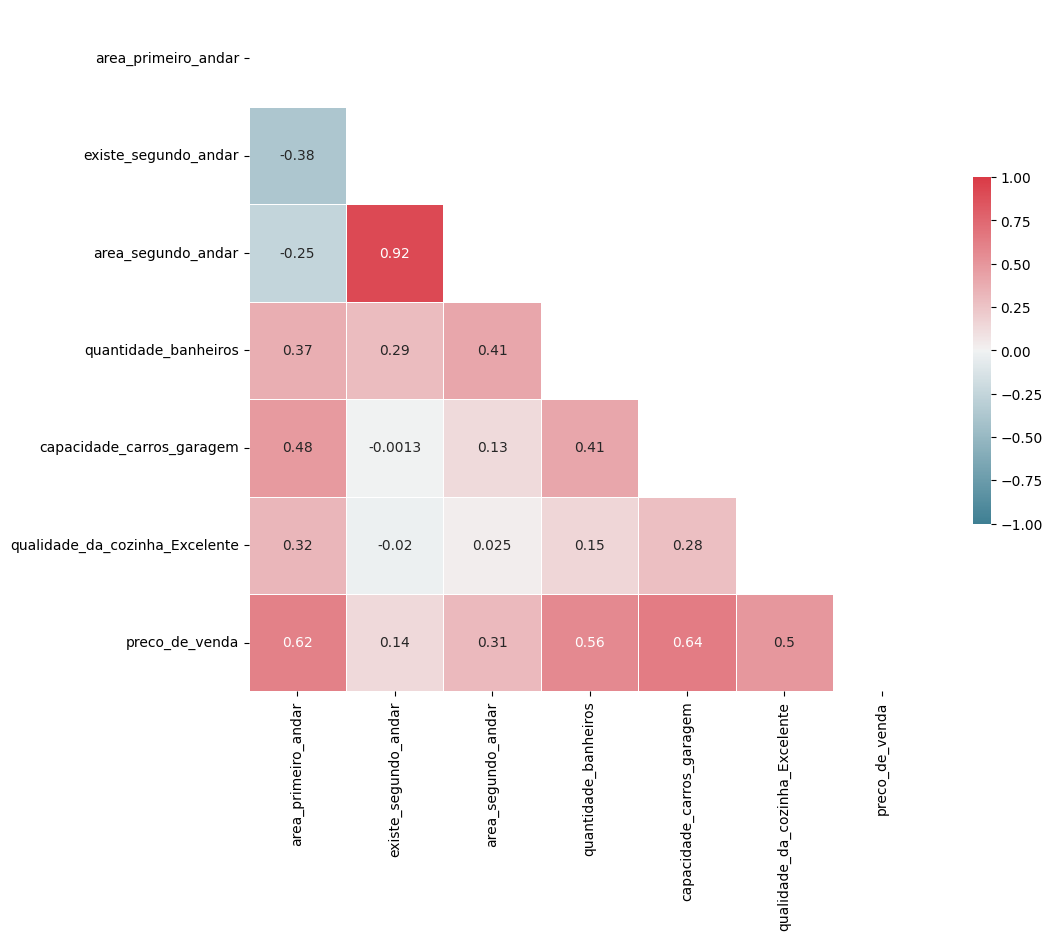

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

In [5]:
#Usando outro grafico
import plotly.express as px

Text(0, 0.5, 'preço de venda')

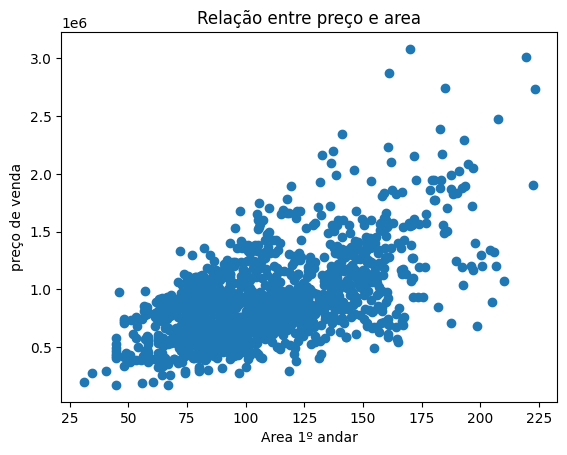

In [6]:
# Como é a relação entre área construída e o preço do imóvel?
plt.scatter(dados["area_primeiro_andar"], dados["preco_de_venda"])
plt.title("Relação entre preço e area")
plt.xlabel("Area 1º andar")
plt.ylabel("preço de venda")

Text(0, 0.5, 'Preço de venda')

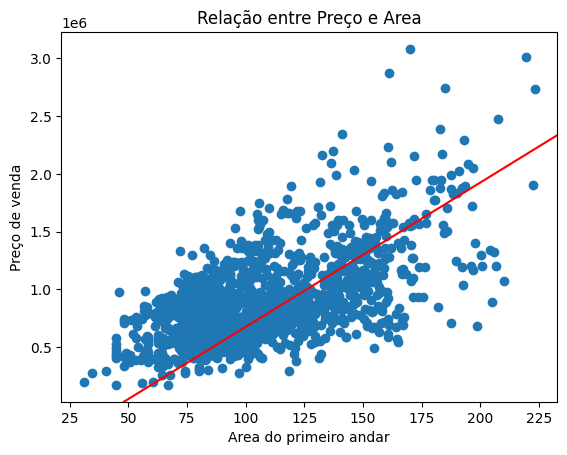

In [7]:
# Aparentemente, quanto maior a área do primeiro andar, maior o preço da casa.
# E se quisermos traçar uma linha que melhor representa esse comportamento?
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.axline(xy1=(66, 250000), xy2=(190, 1800000), color= "red") #Criando reta no grafico
plt.title("Relação entre Preço e Area")
plt.xlabel("Area do primeiro andar")
plt.ylabel("Preço de venda")

In [8]:
# Qual a reta que melhor se adequa a relação?
px.scatter(dados, x = 'area_primeiro_andar', y = 'preco_de_venda', trendline_color_override="red", trendline = 'ols' )

In [9]:
# import train_test_split
from sklearn.model_selection import train_test_split
#Definindo y eX
y = dados['preco_de_venda']
X = dados.drop(columns = 'preco_de_venda')

In [10]:
#Aplicando o split do y e x
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state= 230)

In [11]:
#Dados de treino para usar a fórmula
df_train = pd.DataFrame(data= X_train) 
df_train['preco_de_venda'] = Y_train

In [12]:
#import ols
from statsmodels.formula.api import ols

In [13]:
# ajustando o primeiro modelo
modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data = df_train).fit()

Dividimos o conjunto de dados em duas partes: uma para treinamento e outra para teste

In [14]:
# visualizando os parametros
modelo_0.params

Intercept              152909.288334
area_primeiro_andar      6793.641641
dtype: float64

Como podemos interpretar esse coeficiente? Seu valor está expresso em reais (R$), considerando que a unidade de medida do preço de venda também está em reais. Isso significa que, em média, um aumento de 1 metro quadrado na área do primeiro andar está associado a um acréscimo de R$ 6.793 no valor da casa.

In [15]:
# o resumo do nosso modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Fri, 07 Feb 2025   Prob (F-statistic):          2.22e-105
Time:                        21:54:14   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.529e+05   3

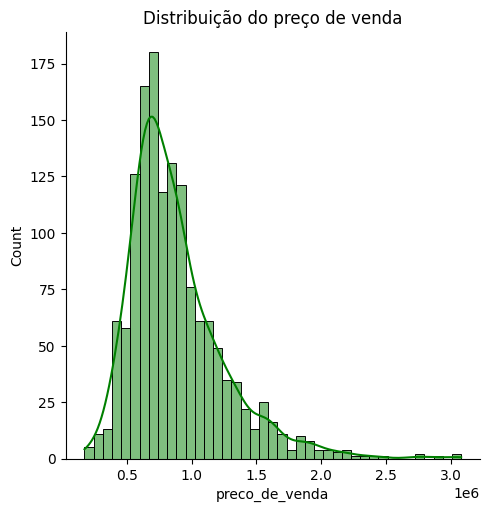

In [16]:
sns.displot(dados['preco_de_venda'], kde=True, color='green')
plt.title('Distribuição do preço de venda')
plt.show()

In [17]:
# observando o R²
print(modelo_0.rsquared)

0.3772801099429788


In [18]:
# Quais são os resíduos
modelo_0.resid

1303   -193023.838744
326    -144522.356193
386     399612.747641
615     -68449.596607
236     166010.592859
            ...      
777     465872.680999
271    -497642.319788
723     461150.204718
560    -540482.733402
768     -37547.820756
Length: 1006, dtype: float64

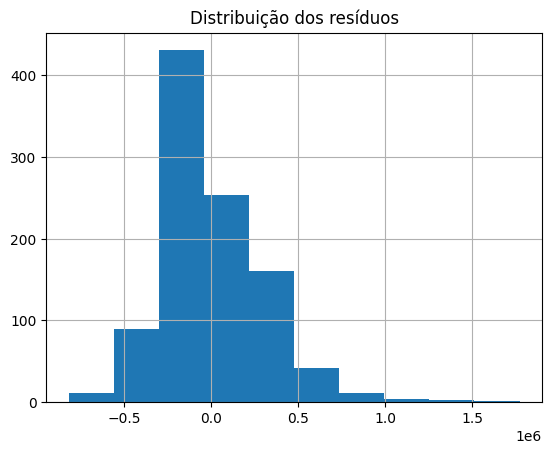

In [19]:
# Como eles estão distribuídos
modelo_0.resid.hist()
plt.title("Distribuição dos resíduos")
plt.show()

In [20]:
# definindo o y previsto
y_predict = modelo_0.predict(X_test)

In [21]:
# importando o r2 score
from sklearn.metrics import r2_score

In [22]:
#printando o R² 
print("R²: ", r2_score(Y_test,y_predict))

R²:  0.38530928723202407


Ao voltarmos e verificarmos o R² do treinamento, que foi de 0.37, notamos que os valores de 0.37 e 0.38 estão bastante próximos. Isso sugere que o modelo está se comportando de maneira consistente tanto nos dados de treinamento quanto nos dados de teste, e restam 62% da variação que não é explicada por essa variável.

"Resumo rapido"

leitura de dados, cria~ção de heatmap, grafico de disperção sem e com linha utilizando 2 modelos, ultilização de ols , utlizando nosso treino pra predição

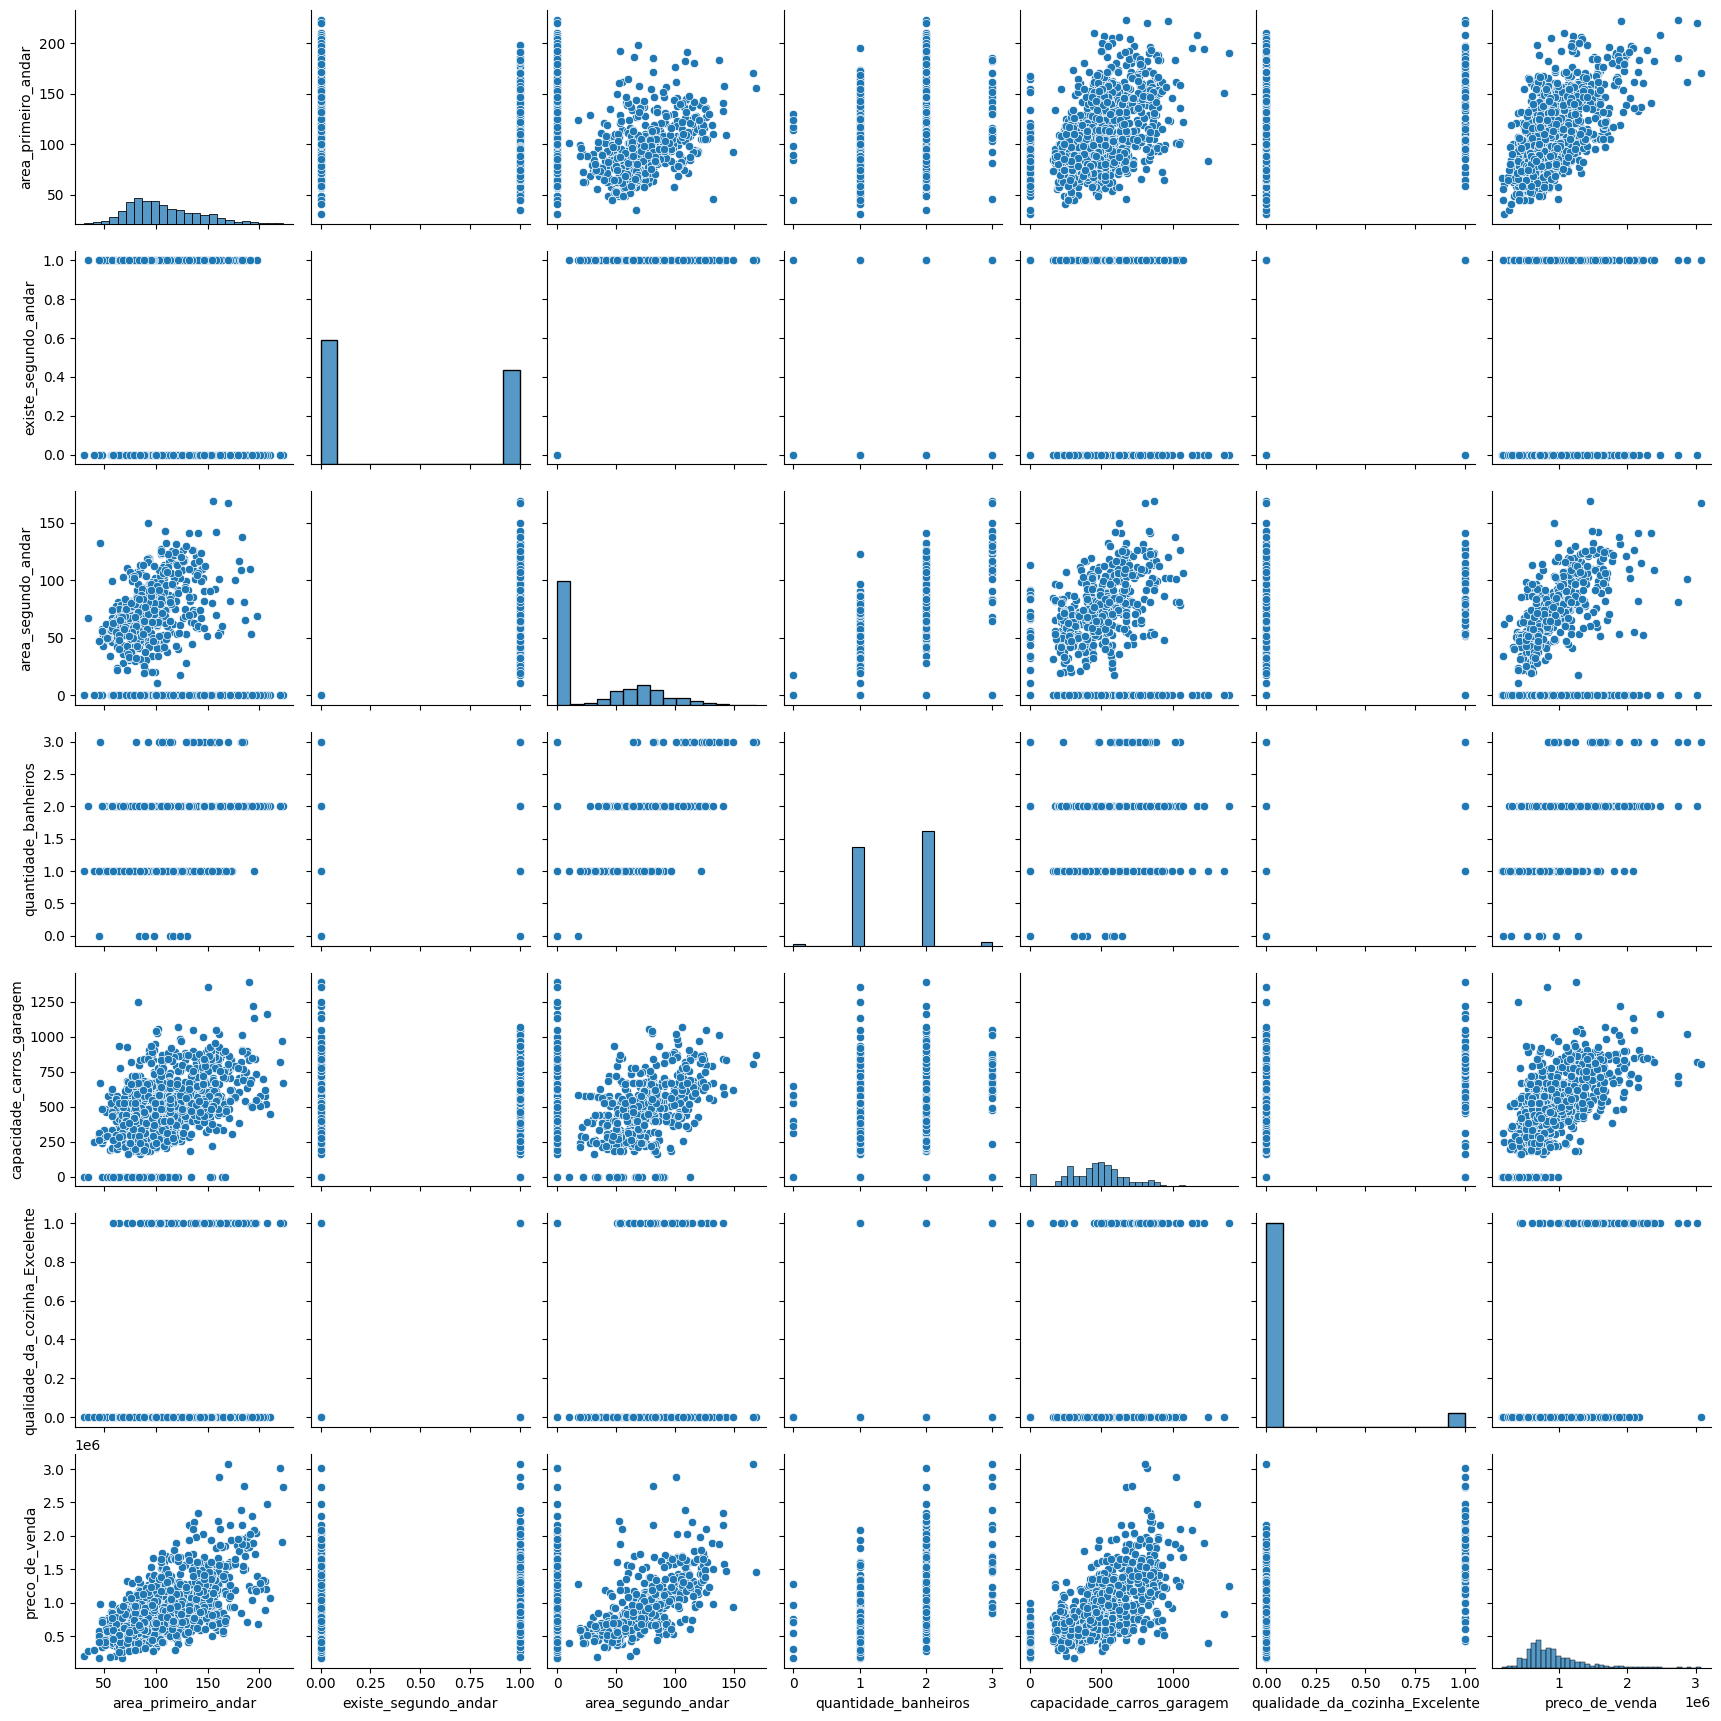

In [23]:
# quais outras características poderiam explicar o preço dos imóveis?, vai cruzar todos os fatores entre si e fazer um par de gráficos para cada variável. usando o pairplot pra ver a relação das variáveis
sns.pairplot(dados)

In [24]:
#colunas
dados.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente', 'preco_de_venda'],
      dtype='object')

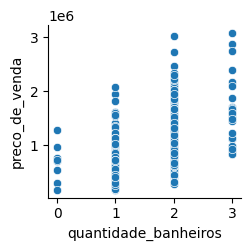

In [25]:
#Vamos olhar apenas com y_vars='preco_de_venda' # Cada vez que a quantidae de banheiro aumenta o preço de venda tambem aumenta não so o preço maximo mas o minimo tbm
sns.pairplot(dados, y_vars = 'preco_de_venda', x_vars = 'quantidade_banheiros')

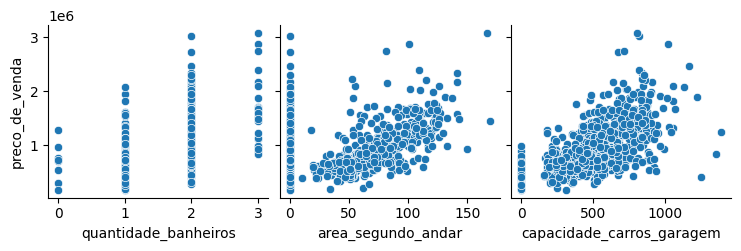

In [26]:
#Vamos olhar apenas com y_vars='preco_de_venda' , procurando outras variaveis que podem explicar o valor da casa
sns.pairplot(dados, y_vars = 'preco_de_venda', x_vars = ['quantidade_banheiros','area_segundo_andar','capacidade_carros_garagem'])

In [27]:
#importando a api do statsmodels
import statsmodels.api as sm

In [28]:
#adicionando o constante, Base do treino
X_train = sm.add_constant(X_train)

In [29]:
X_train.head()

,const,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


In [30]:
#criando o modelo de regressão (sem fómula): saturado, variaveis q podem explicar o modelo, 
modelo_1 = sm.OLS(Y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'area_segundo_andar','quantidade_banheiros','capacidade_carros_garagem',
                           'qualidade_da_cozinha_Excelente']]).fit()

In [31]:
#modelo sem a área do segundo andar
modelo_2 = sm.OLS(Y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'quantidade_banheiros','capacidade_carros_garagem',
                           'qualidade_da_cozinha_Excelente']]).fit()

In [32]:
#modelo sem informações sobre garagem
modelo_3 = sm.OLS(Y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'quantidade_banheiros',
                           'qualidade_da_cozinha_Excelente']]).fit()

In [33]:
#resumo do modelo 1
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     477.4
Date:                Fri, 07 Feb 2025   Prob (F-statistic):          2.79e-289
Time:                        21:54:18   Log-Likelihood:                -13640.
No. Observations:                1006   AIC:                         2.729e+04
Df Residuals:                     999   BIC:                         2.733e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [34]:
#resumo do modelo 2
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     485.3
Date:                Fri, 07 Feb 2025   Prob (F-statistic):          1.93e-264
Time:                        21:54:18   Log-Likelihood:                -13701.
No. Observations:                1006   AIC:                         2.741e+04
Df Residuals:                    1000   BIC:                         2.744e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [35]:
#resumo do modelo 3
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     467.1
Date:                Fri, 07 Feb 2025   Prob (F-statistic):          4.15e-227
Time:                        21:54:18   Log-Likelihood:                -13790.
No. Observations:                1006   AIC:                         2.759e+04
Df Residuals:                    1001   BIC:                         2.762e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [36]:
#comparando usando o coeficiente de determinação ou o R²

In [37]:
print("R²")
print("Modelo 0: ", modelo_0.rsquared)
print("Modelo 1: ", modelo_1.rsquared)
print("Modelo 2: ", modelo_2.rsquared)
print("Modelo 3: ", modelo_3.rsquared)

R²
Modelo 0:  0.3772801099429788
Modelo 1:  0.7414024156090393
Modelo 2:  0.7081440416220739
Modelo 3:  0.6511289354898803


emos o número 2 para o modelo 0, porque há dois parâmetros: o intercepto e o efeito do primeiro andar. Já no primeiro modelo temos sete variáveis explicativas, ou seja, sete aspectos explicando o preço da casa — nesse modelo temos, inclusive, o maior R². Isso porque há uma relação entre o R² e a quantidade de fatores explicando o preço da casa.

In [38]:
# parametros q estão no modelo
print(len(modelo_0.params))
print(len(modelo_1.params))
print(len(modelo_2.params))
print(len(modelo_3.params))

2
7
6
5


 multicolinearidade — ou seja, aparentemente, existem alguns efeitos que não estão conseguindo isolar a explicação do preço da casa e estão sendo confundidos.

 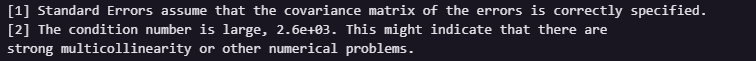

 Quando temos um modelo saturado, que tem todas as informações, temos dois efeitos que falam sobre o segundo andar: a área do segundo andar e se existe um segundo andar. Quando olhamos para o resumo do primeiro modelo, vemos que existe_segundo_andar tem um efeito negativo.

In [39]:
#efeitos do modelo 3
modelo_3.params

const                            -129979.678094
area_primeiro_andar                 6119.653184
existe_segundo_andar              221306.959705
quantidade_banheiros              149036.289458
qualidade_da_cozinha_Excelente    444391.228573
dtype: float64

Os coeficientes obtidos nos parâmetros nos mostram o efeito isolado de cada variável, ou seja, como o preço de venda muda ao alterar uma variável enquanto mantemos as outras constantes. Por exemplo, um aumento de 1 metro quadrado na área do primeiro andar resulta em um aumento médio de R$ 6.119 no preço. Da mesma

In [40]:
#preparar previsao com R² com dados nao utlizidados na base de treino

In [41]:
X_test.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [42]:
#Adicionando a var const no X_teste
X_test = sm.add_constant(X_test)
X_test.columns

Index(['const', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [43]:
# Prevendo com o modelo_3
predict_3 = modelo_3.predict(X_test[['const', 'area_primeiro_andar',
                   'existe_segundo_andar', 'quantidade_banheiros',
                   'qualidade_da_cozinha_Excelente' ]])

In [44]:
#uso do print pra nao aparecer np.float64(0.6511289354898803)
print(modelo_3.rsquared)

0.6511289354898803


In [45]:
# Qual o R² do treino?
print("R²: ", r2_score(Y_test, predict_3))

R²:  0.6432078074497707


dois R² estão bem parecidos, isso significa que ele tem uma capacidade de explicação parecida entre treino e teste

In [46]:
modelo_3.params

const                            -129979.678094
area_primeiro_andar                 6119.653184
existe_segundo_andar              221306.959705
quantidade_banheiros              149036.289458
qualidade_da_cozinha_Excelente    444391.228573
dtype: float64

In [47]:
#Com um novo dado agora para saber qual seria o preço da casa
novo_imovel = pd.DataFrame({'const':[1], #constante sempre sear 1 
                            'area_primeiro_andar':[120], #Area do novo imovel
                            'existe_segundo_andar': [1], #existe entao 1 sendo que: 1 existe e 0 não existe
                            'quantidade_banheiros': [2], #qtd de banheiro no caso 2 banheiros
                            'qualidade_da_cozinha_Excelente': [0] # qualidade media, entao nao é excelente entao 0
                            })

In [48]:
#Qual o preço do imovel com o modelo 0
modelo_0.predict(novo_imovel['area_primeiro_andar'])

0    968146.285305
dtype: float64

In [49]:
#Agora usando o modelo trabalhado modelo_3
modelo_3.predict(novo_imovel)[0]

np.float64(1123758.2426020517)

modelo_0 previu que o valor da casa seria de :968146.285305  -- **R$ 968.146,00**

modelo_3 previu que o valor da casa seria de :1123758.2426020517 -- **R$ 1.123.758,00**

***Agora utilizando uma base de casas sem preço para fazer a precição***

In [50]:
novas_casas = pd.read_csv("Novas_casas.csv", sep = ";")
novas_casas.head(5)

,Casa,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1


In [51]:
novas_casas= novas_casas.drop(columns='Casa')

In [52]:
#Constante
novas_casas = sm.add_constant(novas_casas)
novas_casas.head(5)

,const,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1.0,150,1,2,1
1,1.0,180,0,3,1
2,1.0,120,1,2,1
3,1.0,200,1,3,1
4,1.0,160,0,2,1


In [53]:
#os preços a baseado nas características das casas
modelo_3.predict(novas_casas)

0    1.751739e+06
1    1.863058e+06
2    1.568149e+06
3    2.206758e+06
4    1.591629e+06
5    1.246151e+06
6    1.357470e+06
7    1.552134e+06
8    9.636478e+05
9    1.639974e+06
dtype: float64

In [54]:
imovel_Extra = pd.DataFrame({'const':[1],
                             'area_primeiro_andar':[98],
                             'existe_segundo_andar':[0],
                             'quantidade_banheiros':[1],
                             'qualidade_da_cozinha_Excelente':[1]
                             })

In [55]:
modelo_0.predict(imovel_Extra['area_primeiro_andar'])

0    818686.169194
dtype: float64

In [56]:
modelo_3.predict(imovel_Extra)[0]

np.float64(1063173.8519646404)

***Salvando modelo***

In [57]:
#import pickle
#modelo_3 = 'Modelo_treino.pkl'
#with open('modelo_3.pkl', 'wb') as arquivo:
#    pickle.dump(modelo_3, arquivo)

In [58]:
#with open('modelo_3.pkl', 'rb') as arquivo:
#    modelo_carregado = pickle.load(arquivo)

***Identificando a presença de multicolinearidade***

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
#variáveis explicativas do modelo 1, as do modelo 2 e as do modelo 3.
explicativas_1 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']
             
explicativas_2 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente']

explicativas_3 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']

In [61]:
#DataFrame vazio e adicionar duas colunas
vif_1 = pd.DataFrame()
vif_1["variavel"] = explicativas_1

vif_1["vif"] = [variance_inflation_factor(X_train[explicativas_1], i) for i in range(len(explicativas_1))]
vif_1

,variavel,vif
0,const,20.230833
1,area_primeiro_andar,2.193680
2,existe_segundo_andar,7.455059
3,area_segundo_andar,7.589396
4,quantidade_banheiros,1.720795
5,capacidade_carros_garagem,1.570078
6,qualidade_da_cozinha_Excelente,1.182606


In [62]:
vif_3 = pd.DataFrame()
vif_3["variavel"] = explicativas_3

vif_3["vif"] = [variance_inflation_factor(X_train[explicativas_3], i) for i in range(len(explicativas_3))]
vif_3

,variavel,vif
0,const,18.773457
1,area_primeiro_andar,1.919046
2,existe_segundo_andar,1.644067
3,quantidade_banheiros,1.539255
4,qualidade_da_cozinha_Excelente,1.151795


In [63]:
#Prevendo valores de x
y_previsto_train =  modelo_3.predict(X_train[explicativas_3])

In [ ]:
#scarter plot entre y_previsto_train e y_train Y é o valor de venda da casa
fig = px.scatter(x=y_previsto_train, y=Y_train,
                 title='Previsão X Real',
                 labels={'x':'Preço previsto','y':'Preço real'})
fig.show()

Mas quando olhamos para casas mais caras, mais para o final desse gráfico, temos pontos mais dispersos, e pode ser que exista uma limitação no nosso modelo nesse caso

In [65]:
#residuos
residuos = modelo_3.resid

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Preço da Casa - Previsão', ylabel='Resíduos'>

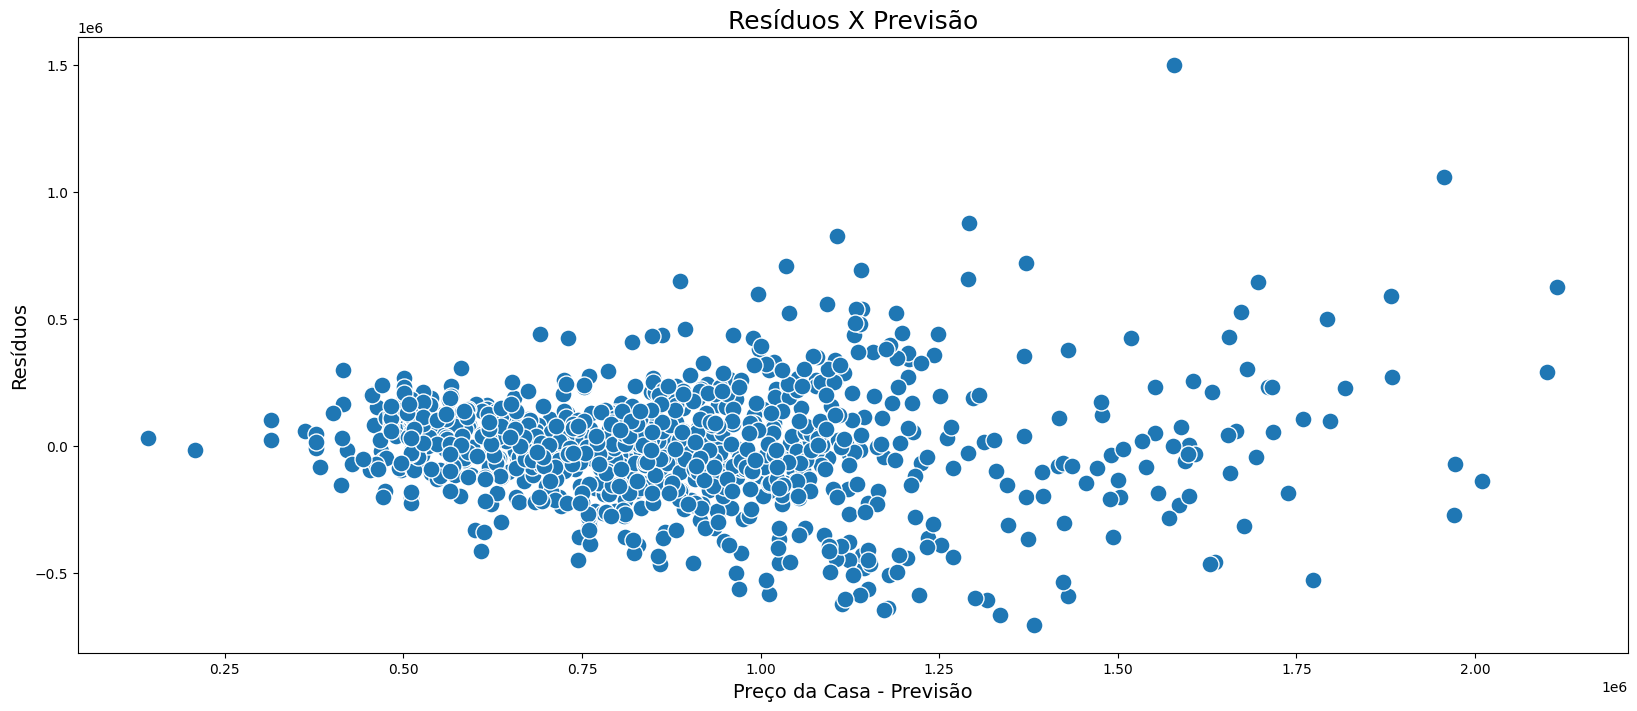

In [66]:
ax = sns.scatterplot(x=y_previsto_train, y=residuos, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço da Casa - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

à medida que o preço da casa aumenta, essa distância fica maior, fica mais longe do zero, então, estamos errando mais, não estamos vendo a presença da homoscedasticidade, que é o que queremos dentro do nosso modelo.